<a href="https://colab.research.google.com/github/Beczheng/datasci_6_regression/blob/main/HHA_507_HW_6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing packages

In [69]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2. Loading the dataset

In [70]:
df = pd.read_csv('hcv_dataset.csv')
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


# 3. Cleaning the dataset

## Removing duplicates

In [71]:
# Removing duplicates in the dataset

df_drop_duplicates = df.drop_duplicates()
df_drop_duplicates

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


## Checking for missing values

In [72]:
# Checking for missing values in the dataset

df_drop_duplicates.isna().sum(axis=0)

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

## Dropping missing values

In [73]:
# Dropping missing values in the dataset

df_drop_missing = df_drop_duplicates.dropna()
df_drop_missing

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


## Cleaning columns

In [74]:
# Removing columns in the dataset

df_drop_columns = df_drop_missing.drop(df.columns[:+1], axis=1)
df_drop_columns

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [75]:
# Cleaning the columns

def clean_column(df):
  def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()

  df.columns = [clean_name(col) for col in df.columns]
  return df

new_df = clean_column(df_drop_columns)
new_df

,category,age,sex,alb,alp,alt,ast,bil,che,chol,crea,ggt,prot
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


# 4. Simple linear regression

## Summary of the simple linear regression

In [76]:
# Stating the independent and dependent variables

print('Independent Variable: Age')
print('Dependent Variable: Prot (Protein)')

Independent Variable: Age
Dependent Variable: Prot (Protein)


In [77]:
# Print the regression

linear_reg_X = sm.add_constant(new_df['age'])
linear_reg_model = sm.OLS(new_df['prot'], linear_reg_X)
linear_reg_results = linear_reg_model.fit()

print(linear_reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   prot   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     15.37
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           9.86e-05
Time:                        00:07:21   Log-Likelihood:                -1815.3
No. Observations:                 589   AIC:                             3635.
Df Residuals:                     587   BIC:                             3643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.9702      1.063     71.462      0.0

**Interpretation:** The R-squared value is 0.026, meaning that about 2.6% of the variance in protein can be explained by age. Therefore, age is not a strong predictor of protein levels.

## Assumption checks

In [78]:
# Assessing linearity of the relationship

stat, p_value = linear_rainbow(linear_reg_results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.8527264438817599, p-value=8.299055266847455e-08


**Interpretation:** There is a linear relationship between age and protein since the p-value is less than 0.05.

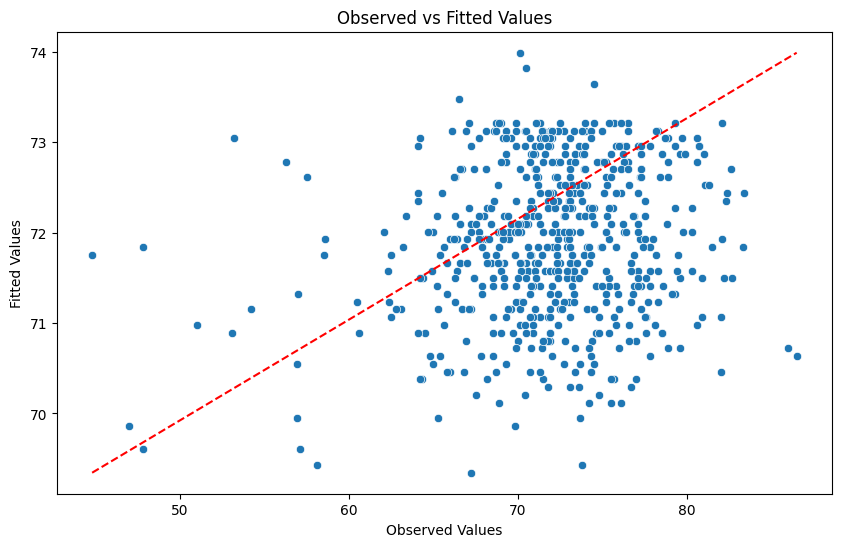

In [79]:
# Plot observed vs fitted values

linear_reg_residuals = linear_reg_results.resid
linear_reg_fitted = linear_reg_results.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x=new_df['prot'], y=linear_reg_fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(new_df['prot']), max(new_df['prot'])], [min(linear_reg_fitted), max(linear_reg_fitted)], color='red', linestyle='--')
plt.show()

In [80]:
# Assessing normality of the residuals

W, p_value = shapiro(linear_reg_residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9503401517868042, p-value=3.585548199493138e-13


**Interpretation:** The residuals do not follow a normal distribution since the p-value is less than 0.05.


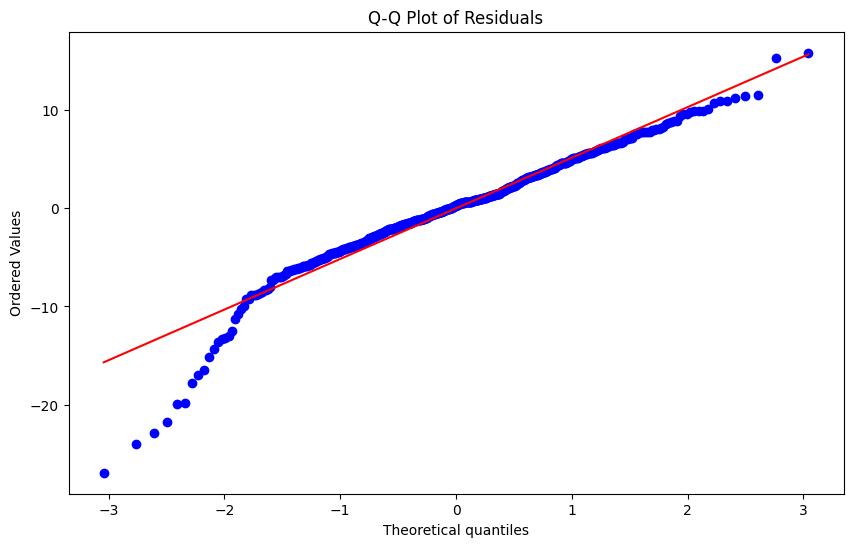

In [81]:
# Plot Q-Q plot of the residuals

plt.figure(figsize=(10, 6))
stats.probplot(linear_reg_residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

**Interpretation:** The Q-Q plots of the residuals do not line up with the theoretical distribution line. This supports the Shapiro-Wilk test.

In [82]:
# Assessing the homogeneity of variance of the residuals

gq_test = het_goldfeldquandt(linear_reg_residuals, linear_reg_results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.6957280405073039, p-value=3.6094911285450203e-06



**Interpretation:** The variances of the residuals are not equal since the p-value is less than 0.05


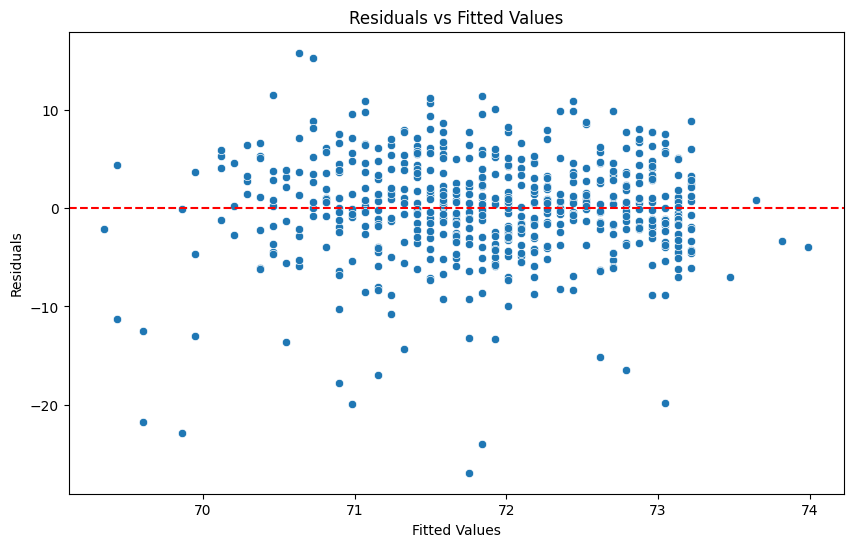

In [83]:
# Plot residuals vs fitted values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=linear_reg_fitted, y=linear_reg_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

**Interpretation:** The differences between variances of the residuals are unequal. This supports the Goldfeld-Quandt test.

# 5. Multiple linear regression



## Summary of the multiple linear regression

In [84]:
# Stating the independent and dependent variables

print('Independent Variables: ALT, AST, and BIL')
print('Dependent Variable: GGT')

Independent Variables: ALT, AST, and BIL
Dependent Variable: GGT


In [85]:
# Print the regression

multiple_reg_X = new_df[['alt', 'ast', 'bil']]
multiple_reg_y = new_df['ggt']

multiple_reg_X = sm.add_constant(multiple_reg_X)
multiple_reg_model = sm.OLS(multiple_reg_y, multiple_reg_X)
multiple_reg_results = multiple_reg_model.fit()

print(multiple_reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ggt   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     65.92
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           9.90e-37
Time:                        00:07:21   Log-Likelihood:                -3102.3
No. Observations:                 589   AIC:                             6213.
Df Residuals:                     585   BIC:                             6230.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3568      3.649      0.372      0.7

**Interpretation:** The R-squared value is 0.253, meaning that about 25.3% of the variance in GGT can be explained by ALT, AST, and BIL. Therefore, ALT, AST, and BIL are not strong predictors of GGT levels.

## Assumption checks

In [86]:
# Assessing linearity of the relationship

stat, p_value = linear_rainbow(multiple_reg_results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=7.882832925495447, p-value=3.1788162473417753e-60


**Interpretation:** There is a linear relationship between age and protein since the p-value is less than 0.05.

In [87]:
# Assessing multicollinearity among IVs

vif_data = pd.DataFrame()
vif_data['Variable'] = multiple_reg_X.columns
vif_data['VIF'] = [variance_inflation_factor(multiple_reg_X.values, i) for i in range(multiple_reg_X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
  Variable       VIF
0    const  3.539840
1      alt  1.076184
2      ast  1.176683
3      bil  1.143285


**Interpretation:** There is little multicollinearity among the independent variables since they all have a value of less than 5.

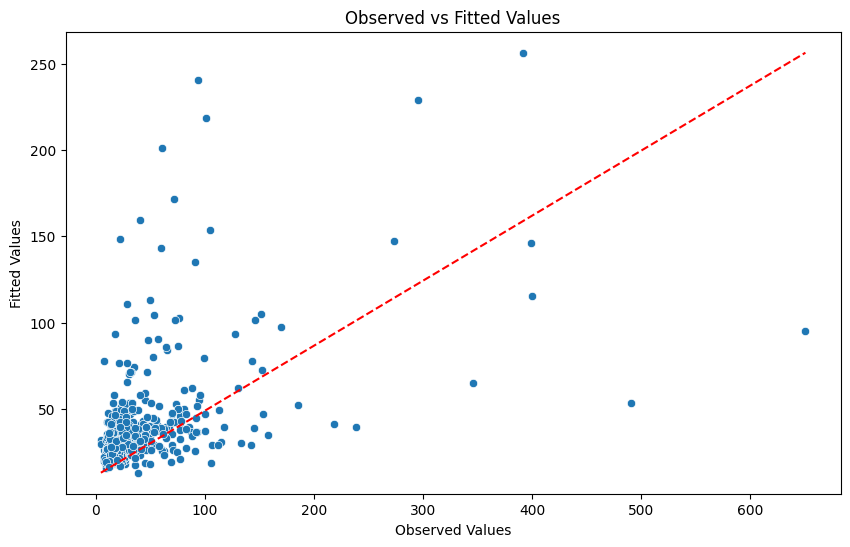

In [88]:
# Plot observed vs fitted values

multiple_reg_residuals = multiple_reg_results.resid
multiple_reg_fitted = multiple_reg_results.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x=new_df['ggt'], y=multiple_reg_fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(new_df['ggt']), max(new_df['ggt'])], [min(multiple_reg_fitted), max(multiple_reg_fitted)], color='red', linestyle='--')
plt.show()

In [89]:
# Assessing normality of the residuals

W, p_value = shapiro(multiple_reg_residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.5483734607696533, p-value=2.8352544920411923e-36


**Interpretation:** The residuals do not follow a normal distribution since the p-value is less than 0.05.


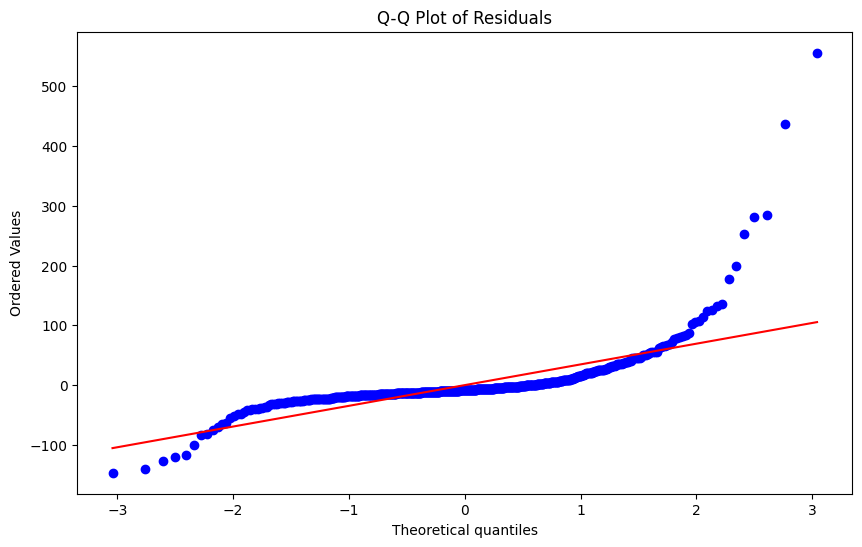

In [90]:
# Plot Q-Q plot of residuals

plt.figure(figsize=(10, 6))
stats.probplot(multiple_reg_residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

**Interpretation:** The Q-Q plots of the residuals do not line up with the theoretical distribution line. This supports the Shapiro-Wilk test.

In [91]:
# Assessing the homogeneity of variance of the residuals

gq_test = het_goldfeldquandt(multiple_reg_residuals, multiple_reg_results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=6.314982146559513, p-value=1.2969004662687018e-49


**Interpretation:** The variances of the residuals are not equal since the p-value is less than 0.05

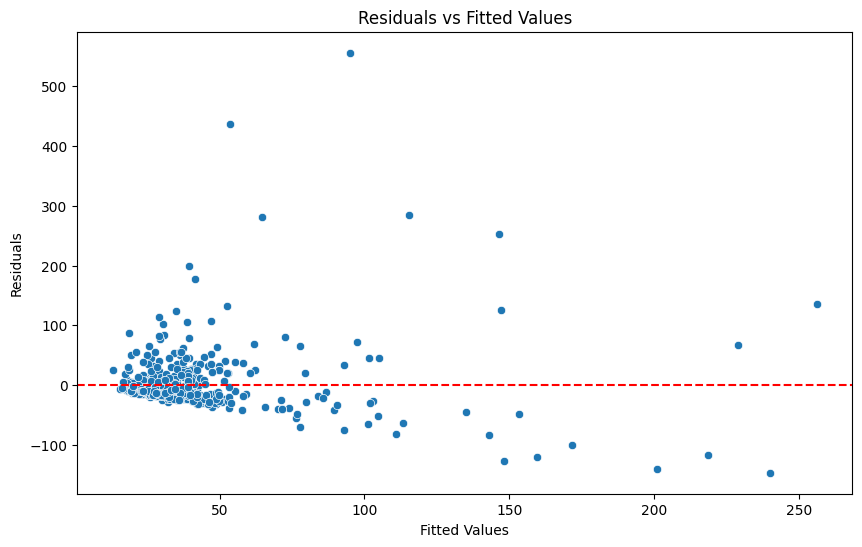

In [92]:
# Plot residuals vs fitted values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=multiple_reg_fitted, y=multiple_reg_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

**Interpretation:** The differences between variances of the residuals are unequal. This supports the Goldfeld-Quandt test.